In [67]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split

In [7]:
# reading the dataset
df = pd.read_csv('salaryData.csv')

df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [9]:
# shape of the dataset
df.shape

(375, 6)

In [11]:
# describing numerical variables
df.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [13]:
# information about data columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [15]:
# checking null values
df.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [16]:
df = df.dropna()

In [18]:
# after dropping
df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [30]:
# unique job count
df['Job Title'].nunique()

174

<Axes: >

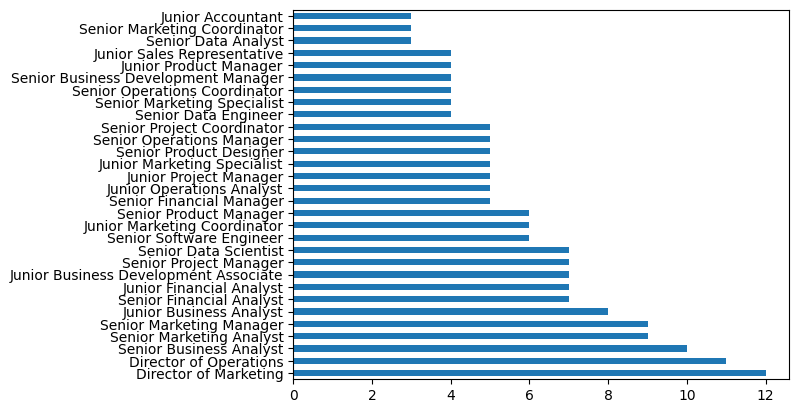

In [33]:
# plotting top 30 jobs with their counts
df['Job Title'].value_counts()[:30].plot(kind='barh')

<Axes: >

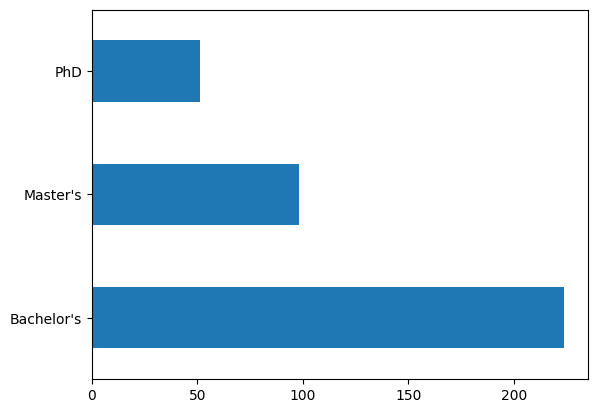

In [34]:
# plotting education levels with their counts
df['Education Level'].value_counts().plot(kind='barh')

<Axes: >

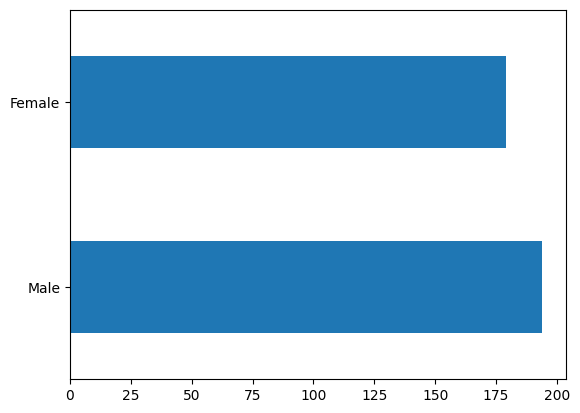

In [35]:
# plotting genders with their counts
df['Gender'].value_counts().plot(kind='barh')

In [36]:
# removing the jobs that have a count less than 5
df_edited = df.groupby('Job Title').filter(lambda x : len(x)>4)
df_edited.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 47 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  147 non-null    float64
 1   Gender               147 non-null    object 
 2   Education Level      147 non-null    object 
 3   Job Title            147 non-null    object 
 4   Years of Experience  147 non-null    float64
 5   Salary               147 non-null    float64
dtypes: float64(3), object(3)
memory usage: 8.0+ KB


In [38]:
# check unique job count again
df_edited['Job Title'].nunique()

21

In [39]:
# converting and encoding
df_edited['Job Title'] = df_edited['Job Title'].astype('category')
df_edited['Job Title Encoded'] = df_edited['Job Title'].cat.codes
df_edited.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Job Title Encoded
47,45.0,Female,Master's,Director of Marketing,16.0,180000.0,0
60,51.0,Female,Master's,Director of Operations,23.0,170000.0,1
63,47.0,Male,PhD,Senior Data Scientist,21.0,180000.0,10
69,49.0,Female,Master's,Senior Financial Analyst,18.0,150000.0,11
77,32.0,Male,Master's,Senior Software Engineer,6.0,100000.0,20


In [40]:
df_edited['Education Level'] = df_edited['Education Level'].astype('category')
df_edited['Education Level Encoded'] = df_edited['Education Level'].cat.codes
df_edited.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Job Title Encoded,Education Level Encoded
47,45.0,Female,Master's,Director of Marketing,16.0,180000.0,0,1
60,51.0,Female,Master's,Director of Operations,23.0,170000.0,1,1
63,47.0,Male,PhD,Senior Data Scientist,21.0,180000.0,10,2
69,49.0,Female,Master's,Senior Financial Analyst,18.0,150000.0,11,1
77,32.0,Male,Master's,Senior Software Engineer,6.0,100000.0,20,1


In [41]:
df_edited['Gender'] = df_edited['Gender'].astype('category')


In [48]:
encoded_df = pd.get_dummies(df_edited, columns = ['Gender'])
encoded_df.head()

,Age,Education Level,Job Title,Years of Experience,Salary,Job Title Encoded,Education Level Encoded,Gender_Female,Gender_Male
47,45.0,Master's,Director of Marketing,16.0,180000.0,0,1,1,0
60,51.0,Master's,Director of Operations,23.0,170000.0,1,1,1,0
63,47.0,PhD,Senior Data Scientist,21.0,180000.0,10,2,0,1
69,49.0,Master's,Senior Financial Analyst,18.0,150000.0,11,1,1,0
77,32.0,Master's,Senior Software Engineer,6.0,100000.0,20,1,0,1


In [52]:
# final dataset
df_final = encoded_df.drop(['Education Level', 'Job Title'], axis=1)
df_final.head()

,Age,Years of Experience,Salary,Job Title Encoded,Education Level Encoded,Gender_Female,Gender_Male
47,45.0,16.0,180000.0,0,1,1,0
60,51.0,23.0,170000.0,1,1,1,0
63,47.0,21.0,180000.0,10,2,0,1
69,49.0,18.0,150000.0,11,1,1,0
77,32.0,6.0,100000.0,20,1,0,1


In [53]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 47 to 374
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      147 non-null    float64
 1   Years of Experience      147 non-null    float64
 2   Salary                   147 non-null    float64
 3   Job Title Encoded        147 non-null    int8   
 4   Education Level Encoded  147 non-null    int8   
 5   Gender_Female            147 non-null    uint8  
 6   Gender_Male              147 non-null    uint8  
dtypes: float64(3), int8(2), uint8(2)
memory usage: 5.2 KB


In [61]:
final_df = pd.DataFrame()
final_df[['age', 'female', 'male', 'education_level', 'job_title', 'years_of_experience', 'salary']] = df_final[['Age', 'Gender_Female', 'Gender_Male', 'Education Level Encoded', 'Job Title Encoded', 'Years of Experience', 'Salary']]
final_df.head()

,age,female,male,education_level,job_title,years_of_experience,salary
47,45.0,1,0,1,0,16.0,180000.0
60,51.0,1,0,1,1,23.0,170000.0
63,47.0,0,1,2,10,21.0,180000.0
69,49.0,1,0,1,11,18.0,150000.0
77,32.0,0,1,1,20,6.0,100000.0


In [64]:
# defining X and y
X = final_df.drop(['salary'], axis=1)
y = final_df['salary']
print(X.head())
print(y.head())

     age  female  male  education_level  job_title  years_of_experience
47  45.0       1     0                1          0                 16.0
60  51.0       1     0                1          1                 23.0
63  47.0       0     1                2         10                 21.0
69  49.0       1     0                1         11                 18.0
77  32.0       0     1                1         20                  6.0
47    180000.0
60    170000.0
63    180000.0
69    150000.0
77    100000.0
Name: salary, dtype: float64


In [66]:
# splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [69]:
# using LinearRegression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [70]:
lr_pred = lr.predict(X_test)

In [71]:
# using DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state = 0)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [72]:
dtr_pred = dtr.predict(X_test)

In [73]:
# using RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 10, random_state = 0)
rfr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [74]:
rfr_pred = rfr.predict(X_test)

In [81]:
# evaluating using R2 Score
from sklearn.metrics import r2_score
print("LinearRegressor       : {:.2f}".format(r2_score(y_test, lr_pred)))
print("DecisionTreeRegressor : {:.3f}".format(r2_score(y_test, dtr_pred)))
print("RandomForestRegressor : {:.3f}".format(r2_score(y_test, rfr_pred)))

LinearRegressor       : 0.95
DecisionTreeRegressor : 0.972
RandomForestRegressor : 0.971


In [82]:
# saving the best model (considering the highest R2 Score)
pickle.dump(dtr, open('salary_data_model_dtr_r2_972.pkl', 'wb'))